## Imports and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("insurance_claims_cleaned.csv")

In [14]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,2,1.0,71610.0,6510.0,13020.0,52080,Saab,92x,2004,1
1,228,42,342868,2006-06-27,IN,250/500,2000.0,1197.22,0,468176,...,0,NaN,5070.0,780.0,780.0,3510,Mercedes,E400,2007,1
2,134,29,687698,2000-09-06,OH,100/300,2000.0,1413.14,0,430632,...,3,0.0,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,0
3,256,41,227811,1990-05-25,IL,250/500,2000.0,1415.74,0,608117,...,2,0.0,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,2014-06-06,IL,500/1000,1000.0,1583.91,0,610706,...,1,0.0,6500.0,1300.0,650.0,4550,Accura,RSX,2009,0


### Missing Values

In [15]:
null_counts = df.isnull().sum()
null_counts

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [16]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,2,1.0,71610.0,6510.0,13020.0,52080,Saab,92x,2004,1
1,228,42,342868,2006-06-27,IN,250/500,2000.0,1197.22,0,468176,...,0,NaN,5070.0,780.0,780.0,3510,Mercedes,E400,2007,1
2,134,29,687698,2000-09-06,OH,100/300,2000.0,1413.14,0,430632,...,3,0.0,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,0
3,256,41,227811,1990-05-25,IL,250/500,2000.0,1415.74,0,608117,...,2,0.0,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,2014-06-06,IL,500/1000,1000.0,1583.91,0,610706,...,1,0.0,6500.0,1300.0,650.0,4550,Accura,RSX,2009,0


### Binding Numeric Data

In [17]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,...,640.000000,1000.000000,1000.000000,657.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.955000,546238.648000,1134.000000,1257.105976,0.0,501214.488000,25126.100000,-26793.700000,11.644000,...,0.471875,0.992000,1.487000,0.477930,52786.607500,7434.290000,7390.770000,37928.950000,2005.103000,0.247000
std,115.113174,9.110652,257063.005276,610.669237,241.929265,0.0,71701.610941,27872.187708,28104.096686,6.951373,...,0.499599,0.820127,1.111335,0.499893,26350.879685,4880.757573,4803.497053,18886.252893,6.015861,0.431483
min,0.000000,19.000000,100804.000000,500.000000,602.876250,0.0,430104.000000,0.000000,-111100.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1090.567500,0.0,448404.500000,0.000000,-51500.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,41962.500000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.830000,0.0,466445.500000,0.000000,-23250.000000,12.000000,...,0.000000,1.000000,1.000000,0.000000,57935.000000,6780.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.0,603251.000000,51025.000000,0.000000,17.000000,...,1.000000,2.000000,2.000000,1.000000,70532.500000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,62.000000,999435.000000,2000.000000,1903.386250,0.0,620962.000000,100500.000000,0.000000,23.000000,...,1.000000,2.000000,3.000000,1.000000,113387.500000,21450.000000,20545.000000,79560.000000,2015.000000,1.000000


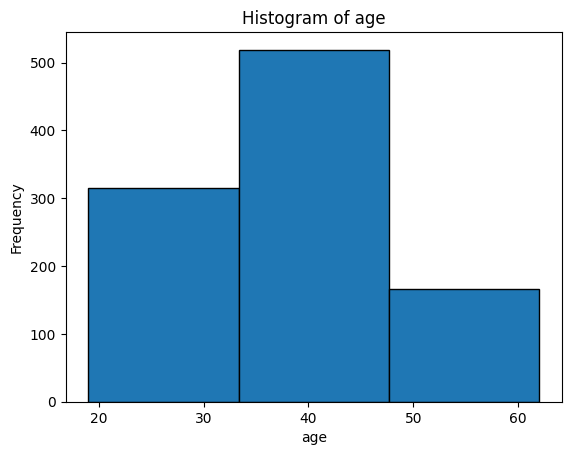

In [18]:
# Choose the column for the histogram
column_name = 'age'

# Plot the histogram
plt.hist(df[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

In [19]:
bin_edges = [0, 30, 55, 100]  # Define the bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df['ages_category'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels)

In [20]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category
0,328,48,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,1.0,71610.0,6510.0,13020.0,52080,Saab,92x,2004,1,Middle Aged
1,228,42,342868,2006-06-27,IN,250/500,2000.0,1197.22,0,468176,...,NaN,5070.0,780.0,780.0,3510,Mercedes,E400,2007,1,Middle Aged
2,134,29,687698,2000-09-06,OH,100/300,2000.0,1413.14,0,430632,...,0.0,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,0,Young Adult
3,256,41,227811,1990-05-25,IL,250/500,2000.0,1415.74,0,608117,...,0.0,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,1,Middle Aged
4,228,44,367455,2014-06-06,IL,500/1000,1000.0,1583.91,0,610706,...,0.0,6500.0,1300.0,650.0,4550,Accura,RSX,2009,0,Middle Aged


In [21]:
bin_edges_customer = [0, 25, 150, 500]  # Define the bin edges
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df['customer_category'] = pd.cut(df['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

In [22]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category
0,328,48,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,71610.0,6510.0,13020.0,52080,Saab,92x,2004,1,Middle Aged,Long-Term Client
1,228,42,342868,2006-06-27,IN,250/500,2000.0,1197.22,0,468176,...,5070.0,780.0,780.0,3510,Mercedes,E400,2007,1,Middle Aged,Long-Term Client
2,134,29,687698,2000-09-06,OH,100/300,2000.0,1413.14,0,430632,...,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,0,Young Adult,Established Client
3,256,41,227811,1990-05-25,IL,250/500,2000.0,1415.74,0,608117,...,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,1,Middle Aged,Long-Term Client
4,228,44,367455,2014-06-06,IL,500/1000,1000.0,1583.91,0,610706,...,6500.0,1300.0,650.0,4550,Accura,RSX,2009,0,Middle Aged,Long-Term Client


## Creating New Features

In [23]:
df["Contract Years"] = df["months_as_customer"]/12

In [24]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years
0,328,48,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,6510.0,13020.0,52080,Saab,92x,2004,1,Middle Aged,Long-Term Client,27.333333
1,228,42,342868,2006-06-27,IN,250/500,2000.0,1197.22,0,468176,...,780.0,780.0,3510,Mercedes,E400,2007,1,Middle Aged,Long-Term Client,19.000000
2,134,29,687698,2000-09-06,OH,100/300,2000.0,1413.14,0,430632,...,7700.0,3850.0,23100,Dodge,RAM,2007,0,Young Adult,Established Client,11.166667
3,256,41,227811,1990-05-25,IL,250/500,2000.0,1415.74,0,608117,...,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,1,Middle Aged,Long-Term Client,21.333333
4,228,44,367455,2014-06-06,IL,500/1000,1000.0,1583.91,0,610706,...,1300.0,650.0,4550,Accura,RSX,2009,0,Middle Aged,Long-Term Client,19.000000


## Feature Joining

In [25]:
df['total_premiums_paid'] = (df['policy_annual_premium']/12) * df['months_as_customer']

In [26]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid
0,328,48,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,13020.0,52080,Saab,92x,2004,1,Middle Aged,Long-Term Client,27.333333,38455.540000
1,228,42,342868,2006-06-27,IN,250/500,2000.0,1197.22,0,468176,...,780.0,3510,Mercedes,E400,2007,1,Middle Aged,Long-Term Client,19.000000,22747.180000
2,134,29,687698,2000-09-06,OH,100/300,2000.0,1413.14,0,430632,...,3850.0,23100,Dodge,RAM,2007,0,Young Adult,Established Client,11.166667,15780.063333
3,256,41,227811,1990-05-25,IL,250/500,2000.0,1415.74,0,608117,...,6340.0,50720,Chevrolet,Tahoe,2014,1,Middle Aged,Long-Term Client,21.333333,30202.453333
4,228,44,367455,2014-06-06,IL,500/1000,1000.0,1583.91,0,610706,...,650.0,4550,Accura,RSX,2009,0,Middle Aged,Long-Term Client,19.000000,30094.290000


In [27]:
df['net_value_of_customer'] = df['total_premiums_paid'] - df['total_claim_amount']

In [28]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,52080,Saab,92x,2004,1,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000
1,228,42,342868,2006-06-27,IN,250/500,2000.0,1197.22,0,468176,...,3510,Mercedes,E400,2007,1,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000
2,134,29,687698,2000-09-06,OH,100/300,2000.0,1413.14,0,430632,...,23100,Dodge,RAM,2007,0,Young Adult,Established Client,11.166667,15780.063333,-18869.936667
3,256,41,227811,1990-05-25,IL,250/500,2000.0,1415.74,0,608117,...,50720,Chevrolet,Tahoe,2014,1,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667
4,228,44,367455,2014-06-06,IL,500/1000,1000.0,1583.91,0,610706,...,4550,Accura,RSX,2009,0,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000


## Saving the csv for late

In [29]:
df.to_csv('advanced_features_claims_data.csv')